In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit  # для ускорения расчётов с помощью jit

In [2]:
@jit(nopython=True)
def f(tt, uu):  # вектор функция правой части ОДУ
    tmp = np.empty(2, np.float64)
    tmp[0] = uu[1]
    tmp[1] = -uu[0]
    return tmp


@jit(nopython=True)
def Euler(tt, dt, tmp):  # один шаг по схеме Эйлера
    tmp = tmp + f(tt, tmp) * dt
    return tmp


@jit(nopython=True)
def solve(uu, n, dt, st):
    uu[1] = uu[0]
    for i in st:  # вычисление первого шага по схеме Эйлера
        uu[1] = Euler(i, st[1] - st[0], uu[1])

    for i in range(0, n - 3, 2):  # сама двухслойная схема с перешагиванием
        uu[i + 2] = uu[i] + 2 * dt * f(dt * (i + 1), uu[i + 1])
        uu[i + 3] = uu[i + 1] + 2 * dt * f(dt * (i + 2), uu[i + 2])

    if n % 2 == 1:  # если последний вектор массива нулевой, то делаем ещё шаг
        uu[n - 1] = uu[n - 3] + 2 * dt * f(dt * (n - 2), uu[n - 2])
    return uu


def solution(tt):  # точное решение задачи
    tmp = 401 / 30 * np.cos(tt)
    return tmp

In [3]:
def graph(tt, uu, dt, step):
    ti = np.linspace(0, T, 1001, dtype=np.float64)
    fig1, ax1 = plt.subplots()
    ax1.plot(ti, solution(ti), label="Точное решение")
    ax1.plot(tt, uu[:, 0], label="Численное решение")
    ax1.set(
        xlabel="время t",
        ylabel="u",
        title=f"Численное решение задачи Коши при шаге {dt} и количестве шагов в схеме Эйлера {step}",
    )
    ax1.grid()
    ax1.legend()
    plt.show()


def loc_error(tt, uu, dt, step):
    fig1, ax1 = plt.subplots()
    ax1.plot(tt, np.fabs(uu[:, 0] - solution(tt)))
    ax1.set(
        xlabel="время t",
        ylabel="u",
        title=f"Модуль локальной ошибки решения при шаге {dt} и количестве шагов в схеме Эйлера {step}",
    )
    ax1.grid()
    plt.show()

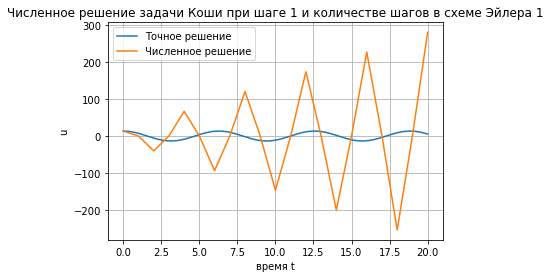

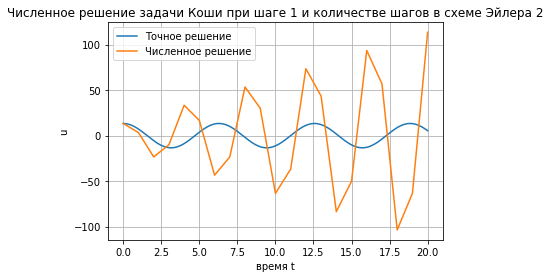

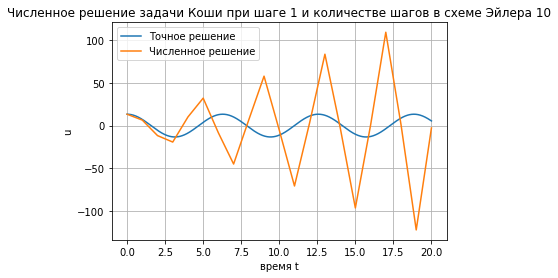

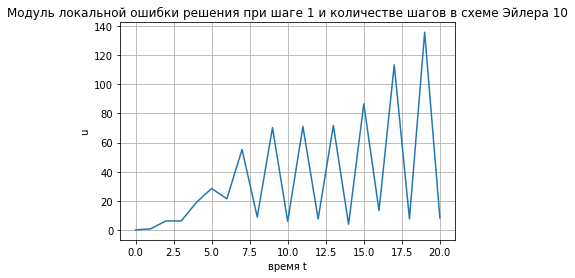

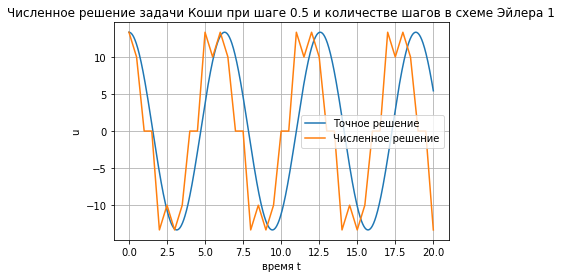

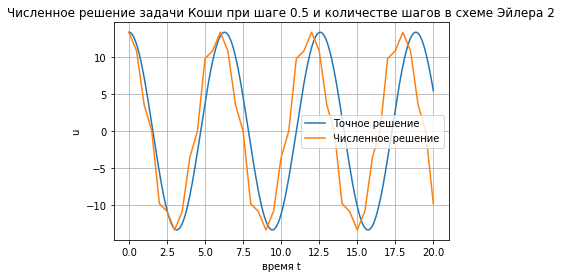

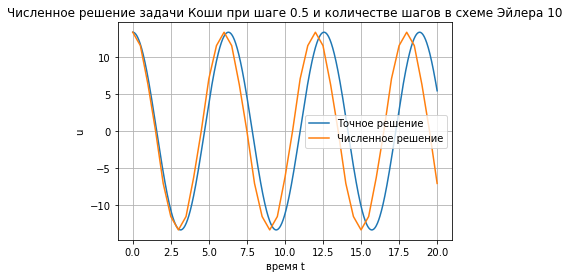

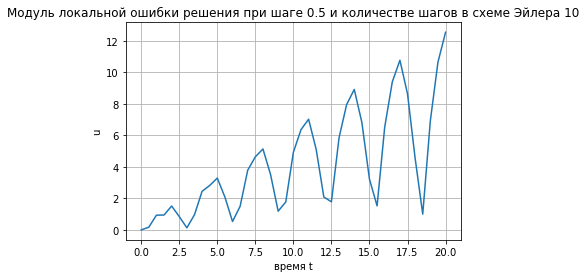

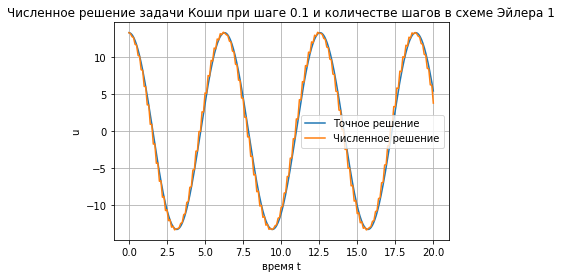

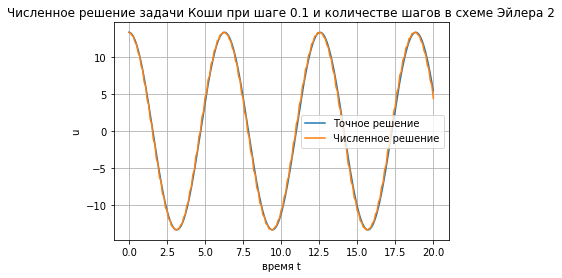

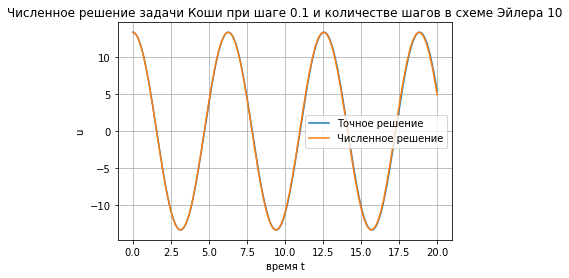

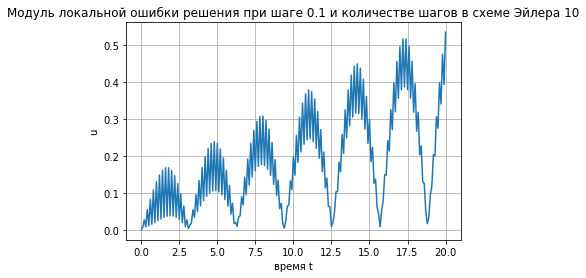

In [4]:
T = 20  # рассматриваемый временной промежуток

for Δt in [1, 0.5, 0.1]:  # перебираем все возможные шаги по сетке
    for steps in [1, 2, 10]:  # все возможные количества шагов для схемы Эйлера
        N = int(T / Δt) + 1  # количество шагов по x и t
        u = np.empty((N, 2), np.float64)  # массив для решения задачи
        t = np.linspace(0, T, N, dtype=np.float64)  # сама сетка
        u[0, 0] = 401 / 30  # заполняю начальное условие задачи для u0
        u[0, 1] = 0  # заполняю начальное условие задачи для v0
        st = np.linspace(0, Δt, steps + 1, dtype=np.float64)  # сетка для Эйлера 
        
        u = solve(u, N, Δt, st)  # вызов функции численного расчёта
        graph(
            t, u, Δt, steps
        )  # построение графиков точного и численного решений
        if (
            steps == 10
        ):  # рассмотрю локальную ошибку при 10 шагах в схеме Эйлера
            loc_error(t, u, Δt, steps)

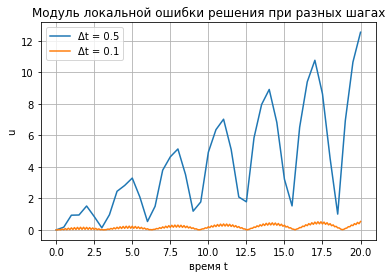

In [5]:
Δt = 0.5
steps = 10
N = int(T / Δt) + 1
u = np.empty((N, 2), np.float64)  # массив для решения задачи
tt = np.linspace(0, T, N, dtype=np.float64)  # сама сетка
u[0, 0] = 401 / 30  # заполняю начальное условие задачи u0
u[0, 1] = 0  # заполняю начальное условие задачи v0
st = np.linspace(0, Δt, steps + 1, dtype=np.float64)

u = solve(u, N, Δt, st)

fig1, ax1 = plt.subplots()
ax1.plot(tt, np.fabs(u[:, 0] - solution(tt)), label="Δt = 0.5")

Δt = 0.1
N = int(T / Δt) + 1
u = np.empty((N, 2), np.float64)  # массив для решения задачи
tt = np.linspace(0, T, N, dtype=np.float64)  # сама сетка
u[0, 0] = 401 / 30  # заполняю начальное условие задачи u0
u[0, 1] = 0  # заполняю начальное условие задачи v0
st = np.linspace(0, Δt, steps + 1, dtype=np.float64)

u = solve(u, N, Δt, st)

ax1.plot(tt, np.fabs(u[:, 0] - solution(tt)), label="Δt = 0.1")
ax1.set(
    xlabel="время t",
    ylabel="u",
    title="Модуль локальной ошибки решения при разных шагах",
)
ax1.grid()
ax1.legend()
plt.show()